# scikit-learn 

## sklearn Life Cycle / Workflow

### Step-1 Getting and splitting data 

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [28]:
heart_disease = pd.read_csv('Heart disease data.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [29]:
#create x / Features / Base data / Data that will help us to predict / independent
xheart = heart_disease.drop('condition',axis=1)
#create y / label / Data that we have to predict / dependent 
yheart = heart_disease['condition']

In [30]:
#splitting data
x_train,x_test,y_train,y_test = train_test_split(xheart,yheart,test_size = 0.25)

In [31]:
len(heart_disease)

297

In [32]:
x_train.shape,x_test.shape

((222, 13), (75, 13))

In [33]:
y_train.shape,y_test.shape

((222,), (75,))

### Step-2 Choosing ML Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [17]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Step-3 Fitting Model

In [18]:
clf.fit(x_train,y_train)

RandomForestClassifier()

### Step-4 Evaluate Model 

In [19]:
pridected_y = clf.predict(x_test)

In [20]:
#accuracy of original data 
clf.score(x_train,y_train)

1.0

In [22]:
#acuuracy of test data 
clf.score(x_test,y_test)

0.8533333333333334

### Step-5 Improve Model

In [29]:
for i in range (10,200,10):
    print('Running Model With', i , 'estimators')
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print('Accuracy is ' , clf.score(x_test,y_test))

Running Model With 10 estimators
Accuracy is  0.8133333333333334
Running Model With 20 estimators
Accuracy is  0.8133333333333334
Running Model With 30 estimators
Accuracy is  0.84
Running Model With 40 estimators
Accuracy is  0.84
Running Model With 50 estimators
Accuracy is  0.8266666666666667
Running Model With 60 estimators
Accuracy is  0.7866666666666666
Running Model With 70 estimators
Accuracy is  0.8133333333333334
Running Model With 80 estimators
Accuracy is  0.84
Running Model With 90 estimators
Accuracy is  0.8533333333333334
Running Model With 100 estimators
Accuracy is  0.8266666666666667
Running Model With 110 estimators
Accuracy is  0.84
Running Model With 120 estimators
Accuracy is  0.8133333333333334
Running Model With 130 estimators
Accuracy is  0.8533333333333334
Running Model With 140 estimators
Accuracy is  0.84
Running Model With 150 estimators
Accuracy is  0.84
Running Model With 160 estimators
Accuracy is  0.8266666666666667
Running Model With 170 estimators
Acc

In [47]:
#improved model
clf = RandomForestClassifier(n_estimators=50).fit(x_train,y_train)

In [48]:
clf.score(x_test,y_test)

0.8666666666666667

### Step-6 Save Model 

In [50]:
import pickle 
pickle.dump(clf,open('Heart Disease Pridictor.pkl','wb'))

In [54]:
#load model
load_model = pickle.load(open('Heart Disease Pridictor.pkl','rb'))

In [55]:
load_model.score(x_test,y_test)

0.8666666666666667

## sklearn LifeCycle Advanced 

### Step 1 Getting Data 

In [1]:
# 1.1 Split data into features and label

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
#using heart disease data 
heart_disease = pd.read_csv('Heart disease data.csv')
xheart1 = heart_disease.drop('condition',axis=1)
yheart1 = heart_disease['condition']

In [3]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(xheart1,yheart1,test_size = 0.25)

In [4]:
len(heart_disease)

297

In [5]:
x_train1.shape,y_train1.shape,x_test1.shape,y_test1.shape  

((222, 13), (222,), (75, 13), (75,))

In [6]:
# 1.2 Filling Missing Values 

In [7]:
#using phone data 
import pandas as pd
phone_data = pd.read_csv('phonedatalarge.csv')

In [8]:
phone_data.head()

,Make,Color,Memory(kb),Sim card,Price
0,Nokia,White,576888.0,4.0,$220.00
1,Samsung,NaN,255566.0,4.0,$700.00
2,Iphone,Blue,455666.0,4.0,$600.00
3,Motorola,Green,134241.0,4.0,$350.00
4,Nokia,Black,314235.0,3.0,$400.00


In [9]:
phone_data.isna().sum()

Make          1
Color         2
Memory(kb)    2
Sim card      1
Price         3
dtype: int64

In [10]:
# Filling NaN Values  using sklearn 
phone_data.dropna(subset=['Price'],inplace = True )
phone_data.isna().sum()

Make          1
Color         2
Memory(kb)    1
Sim card      1
Price         0
dtype: int64

In [11]:
xphone = phone_data.drop('Price',axis=1)
#y = phone_data['Price']

In [12]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
#SimpleImputer : replace missing values in a dataset, using a variety of input strategies
#ColumnTransformer : used to create and apply separate transformers for numerical and categorical data

In [14]:
#defining strategy to fill columns 
string_feature = SimpleImputer(strategy = 'constant',fill_value = 'missing')
sim_card = SimpleImputer(strategy = 'constant',fill_value = 5)
num_feature = SimpleImputer(strategy = 'mean')

In [15]:
phone_data.columns = phone_data.columns.str.strip()

In [16]:
#defining columns to apply these imputers
strings = ['Make','Color']
sim = ['Sim card']
num = ['Memory(kb)']

In [17]:
#applying imputers
imputer = ColumnTransformer([('string_imp',string_feature,strings),('sim_imp',sim_card,sim),('num_imp',num_feature,num)])

In [18]:
xphone.columns

Index(['Make', 'Color', 'Memory(kb)', 'Sim card'], dtype='object')

In [19]:
filled_x = imputer.fit_transform(xphone)

In [20]:
filled_x_df = pd.DataFrame(filled_x,columns = ['Make','Color','Memory(kb)','Sim card'])

In [21]:
filled_x_df .isna().sum()

Make          0
Color         0
Memory(kb)    0
Sim card      0
dtype: int64

In [22]:
filled_x_df.head()

,Make,Color,Memory(kb),Sim card
0,Nokia,White,4.0,576888.0
1,Samsung,missing,4.0,255566.0
2,Iphone,Blue,4.0,455666.0
3,Motorola,Green,4.0,134241.0
4,Nokia,Black,3.0,314235.0


In [23]:
# 1.3 converting data types 

In [24]:
#using phone data 2
phone_data.dtypes

Make           object
Color          object
Memory(kb)    float64
Sim card      float64
Price          object
dtype: object

In [25]:
phone_data.head()

,Make,Color,Memory(kb),Sim card,Price
0,Nokia,White,576888.0,4.0,$220.00
1,Samsung,NaN,255566.0,4.0,$700.00
2,Iphone,Blue,455666.0,4.0,$600.00
3,Motorola,Green,134241.0,4.0,$350.00
4,Nokia,Black,314235.0,3.0,$400.00


In [26]:
phone_data['Price'] = phone_data['Price'].str[:-3]

In [27]:
phone_data.head()

,Make,Color,Memory(kb),Sim card,Price
0,Nokia,White,576888.0,4.0,$220.
1,Samsung,NaN,255566.0,4.0,$700.
2,Iphone,Blue,455666.0,4.0,$600.
3,Motorola,Green,134241.0,4.0,$350.
4,Nokia,Black,314235.0,3.0,$400.


In [28]:
phone_data['Price'] = phone_data['Price'].str.replace(r'[\$\.\,]','',regex = True )
phone_data.head()

,Make,Color,Memory(kb),Sim card,Price
0,Nokia,White,576888.0,4.0,220
1,Samsung,NaN,255566.0,4.0,700
2,Iphone,Blue,455666.0,4.0,600
3,Motorola,Green,134241.0,4.0,350
4,Nokia,Black,314235.0,3.0,400


In [29]:
phone_data['Price'] = phone_data['Price'].astype(int)
yphone = phone_data['Price']
yphone

0     220
1     700
2     600
3     350
4     400
     ... 
93    440
94    440
95    440
96    440
97    440
Name: Price, Length: 96, dtype: int32

In [30]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(xphone,yphone,test_size = 0.2)

In [31]:
phone_data.columns = phone_data.columns.str.strip()
phone_data['Make'] = phone_data['Make'].str.strip()

In [32]:
from sklearn.preprocessing import OneHotEncoder
#One hot encoding is a technique that is used to represent categorical variables as numerical values in a machine learning model

In [33]:
features = ['Make','Color']

In [34]:
encoder = OneHotEncoder(sparse_output=False)

In [35]:
transformer = ColumnTransformer ([('type_change',encoder,features)],remainder = 'passthrough')

In [36]:
transformed_x = transformer.fit_transform(filled_x_df)

In [37]:
transformed_x_df = pd.DataFrame(transformed_x)
transformed_x_df 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,576888.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,255566.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,455666.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,134241.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,314235.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,455666.0
92,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,134344.0
93,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,134344.0
94,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,134344.0


### Step 2 Choosing Machine Learning Model

#### Regression Problem 

In [38]:
from sklearn.datasets import fetch_california_housing #built in dataset
housing = fetch_california_housing()
housing ;
df_housing = pd.DataFrame(housing['data'],columns=housing['feature_names'])
df_housing['target'] = pd.Series(housing['target'])
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [39]:
len(df_housing )

20640

In [40]:
#Ridge Model 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(1)
xhousing = df_housing.drop('target',axis = 1)
yhousing = df_housing['target']
x_train3,x_test3,y_train3,y_test3 = train_test_split(xhousing,yhousing,test_size = 0.2)
reg = Ridge()
reg.fit(x_train3,y_train3)
reg.score(x_test3,y_test3)

0.5965957761160752

In [41]:
#Improved Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(1)
rfg = RandomForestRegressor()
xhousing1 = df_housing.drop('target',axis = 1)
yhousing1 = df_housing['target']
x_train3,x_test3,y_train3,y_test3 = train_test_split(xhousing1,yhousing1,test_size = 0.2)
rfg.fit(x_train3,y_train3)
rfg.score(x_test3,y_test3)

0.8070687053407989

In [42]:
print('First Model For regression : ', reg.score(x_test3,y_test3) , ' ,  Improved Model : ' , rfg.score(x_test3,y_test3) )

First Model For regression :  0.5965957761160752  ,  Improved Model :  0.8070687053407989


#### Classification Problem

In [43]:
#linearSVC model
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(1)
svc = LinearSVC()
heart_disease = pd.read_csv('Heart disease data.csv')
xheart1 = heart_disease.drop('condition',axis=1)
yheart1 = heart_disease['condition']
x_train1,x_test1,y_train1,y_test1 = train_test_split(xheart1,yheart1,test_size = 0.2)
svc.fit(x_train1,y_train1)
svc.score(x_test1,y_test1)

C:\Users\Idea Tech\Desktop\ml_project\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Idea Tech\Desktop\ml_project\venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8166666666666667

In [44]:
#Improveded Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(1)
rfc = RandomForestClassifier()
heart_disease = pd.read_csv('Heart disease data.csv')
xheart2 = heart_disease.drop('condition',axis=1)
yheart2 = heart_disease['condition']
x_train1,x_test1,y_train1,y_test1 = train_test_split(xheart2,yheart2,test_size = 0.2)
rfc.fit(x_train1,y_train1)
rfc.score(x_test1,y_test1)

0.85

In [45]:
print('First Model For Classification : ', svc.score(x_test1,y_test1) , ' ,  Improved Model : ' , rfc.score(x_test1,y_test1) )

First Model For Classification :  0.8166666666666667  ,  Improved Model :  0.85


### Step 3 Fitting Model 
### Two Stages :
### 1. Training 
### 2. Testing or Prediction

#### Classification problem

In [46]:
# Classification problem
#stage 1
rfc.fit(x_train1,y_train1)
#stage 2 
# 2 methods for prediction 'predict()' and 'predict_proba()'
#predict()
prediction1 = rfc.predict(x_test1)
prediction1 #predicted values 

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [47]:
np.array(y_test1) #actual values 

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [48]:
#evaluating
# 3 methods to check accuracy 
from sklearn.metrics import accuracy_score
print(np.mean(prediction1==y_test1)) #Method 1 
print(rfc.score(x_test1,y_test1)) #Method 2 
print(accuracy_score(prediction1,y_test1)) #Method 3

0.8166666666666667
0.8166666666666667
0.8166666666666667


In [49]:
#predict_proba()
prediction2 = rfc.predict_proba(x_test1)
#tells the accuracy of individual result
print(prediction1[:5],'\n')
print(prediction2[:5])

[0 1 0 0 1] 

[[0.75 0.25]
 [0.44 0.56]
 [0.98 0.02]
 [0.53 0.47]
 [0.34 0.66]]


#### Regression Problem

In [50]:
#Regression Problem
#stage 1 
rfg.fit(x_train3,y_train3)
#stage 2 
pred = rfg.predict(x_test3)
print(pred[:5],'\n')
print(np.array(y_test3[:5]))

[3.6497013 0.63482   2.37387   1.3215701 2.84164  ] 

[3.55  0.707 2.294 1.125 2.254]


In [51]:
pred

array([3.6497013, 0.63482  , 2.37387  , ..., 2.63335  , 2.20288  ,
       1.1680601])

In [52]:
#calculating mean absolue error to check the difference between predicted and original data
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test3,pred)

0.32509394893410865

### Step 4 Evaluaing The Model

In [53]:
# 3 Methods to evaluate sklearn Models / Estimators 
# score methods
# scoring parameters
# problem specific matric function

#### Classification Model Evaluation
#### 1. Accuracy 
#### 2. Area Under the Curve 
#### 3. Confusion Matrix
#### 4. Classification Report

##### 1.  Accuracy

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(4)
x = heart_disease.drop('condition', axis=1)
y = heart_disease['condition']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
heart_model = RandomForestClassifier().fit(x_train,y_train)
print(cross_val_score(heart_model,x,y,cv=5,scoring= None))
print('\n Heart Disease Cross Validation Accuracy : ',np.mean(cross_val_score(heart_model,x,y,cv=5,scoring= None))*100,'%')

[0.56666667 0.78333333 0.81355932 0.88135593 0.62711864]

 Heart Disease Cross Validation Accuracy :  72.40677966101694 %


##### 2. Area Under the Curve (AUC)    
#####           OR    
##### Reciever Operating Characteristics Curve (ROC)

In [12]:
from sklearn.metrics import roc_curve
# 4 cases of predict_proba()
# Case 1 : True Positive : Truth = 1 , Model Prediction = 1
# Case 2 : Flase Positive : Truth = 0 , Model Prediction = 1
# Case 3 : True Negative : Truth = 0 , Model Prediction = 0
# Case 4 : Flase Negative : Truth = 1 , Model Prediction = 0
y_proba = heart_model.predict_proba(x_test)
y_proba[:5]

array([[0.13, 0.87],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.65, 0.35],
       [0.99, 0.01]])

In [13]:
# Calculate Flase Positive Rate (fpr) , True Positive Rate (tpr) and threshold
y_proba_positive = y_proba[:, 1] # for 'condition = 1' column
fpr,tpr,threshold = roc_curve(y_test,y_proba_positive)
print(fpr,'\n\n')
print(tpr,'\n\n')
print(threshold)

[0.         0.         0.         0.         0.         0.
 0.         0.03030303 0.03030303 0.03030303 0.03030303 0.06060606
 0.12121212 0.21212121 0.24242424 0.3030303  0.33333333 0.33333333
 0.36363636 0.36363636 0.39393939 0.42424242 0.45454545 0.48484848
 0.48484848 0.66666667 0.72727273 0.81818182 0.87878788 1.        ] 


[0.         0.03703704 0.11111111 0.25925926 0.33333333 0.40740741
 0.44444444 0.44444444 0.51851852 0.59259259 0.66666667 0.66666667
 0.66666667 0.66666667 0.7037037  0.7037037  0.74074074 0.77777778
 0.77777778 0.81481481 0.81481481 0.85185185 0.85185185 0.88888889
 1.         1.         1.         1.         1.         1.        ] 


[ inf 1.   0.94 0.92 0.88 0.87 0.85 0.81 0.69 0.68 0.62 0.57 0.53 0.46
 0.45 0.43 0.42 0.39 0.37 0.36 0.35 0.34 0.33 0.32 0.26 0.08 0.04 0.03
 0.01 0.  ]


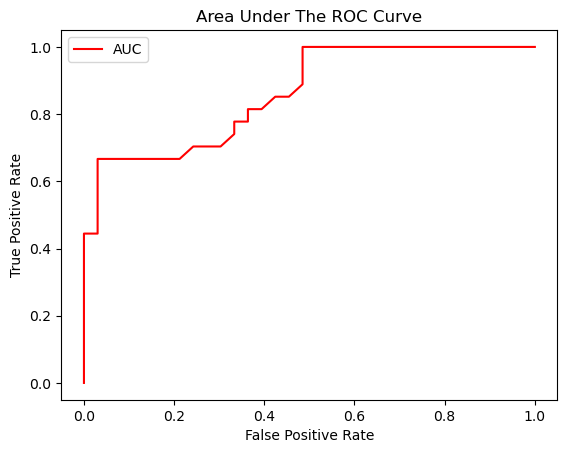

In [14]:
#function to plot roc 
import matplotlib.pyplot as plt 
def plot_roc(fpr,tpr):
    plt.plot(fpr,tpr,color='red',label = 'AUC')
    plt.title('Area Under The ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
plot_roc(fpr,tpr)

In [15]:
# value of ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_proba_positive)

0.8608305274971942

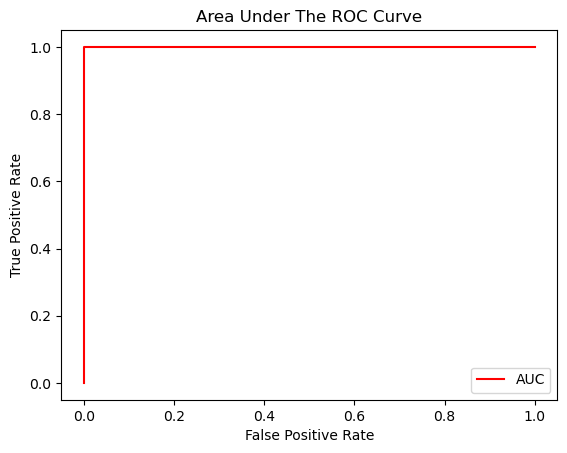

In [16]:
# Ideal Curve 
#Ideal AUC = 1 
fpr,tpr,threshold = roc_curve(y_test,y_test)
plot_roc(fpr,tpr)

##### 3. Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix 
y_predicted = heart_model.predict(x_test)
conf_mat = confusion_matrix(y_test,y_predicted)
conf_mat
pd.crosstab(y_test,y_predicted,rownames = ['Truth'],colnames = ['Predicted'])
#y_test,y_predicted
pd.crosstab()

TypeError: crosstab() missing 2 required positional arguments: 'index' and 'columns'

In [69]:
len(y_test)

60

In [114]:
#total 1s in data 
ones = 18+4
#total 0s in data 
zeros = 29+9
# predicted values 
true_positive = conf_mat[1][1]
false_positive = conf_mat[1][0]
true_negative = conf_mat[0][0]
false_negative = conf_mat[0][1]
print('\nConfusion Matrix  : \n' ,conf_mat)
print('\ntotal 1s in data : ' ,ones)
print('\ntotal 0s in data : ',zeros)
print('\ntrue_positive : ',true_positive)
print('\nfalse_positive : ',false_positive)
print('\ntrue_negative : ',true_negative)
print('\nfalse_negative : ',false_negative)


Confusion Matrix  : 
 [[29  4]
 [ 9 18]]

total 1s in data :  22

total 0s in data :  38

true_positive :  18

false_positive :  9

true_negative :  29

false_negative :  4


In [108]:
#to plot Confusion Matrix 
import sys
!conda install --yes --prefix "C:\Users\Idea Tech\Desktop\ml_project\venv" seaborn

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Idea Tech\Desktop\ml_project\venv

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-3.0.13             |       h2bbff1b_2         7.5 MB
    seaborn-0.12.2             |  py312haa95532_0         556 KB
    ------------------------------------------------------------
                                           Total:         8.0 MB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/win-64::seaborn-0.12.2-py312haa95532_0 

The following packages will be UPDATED:

  openssl                                 3.0.13-h2bbff1b_1 --> 3.0.13-h2bbff1b_2 



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [130]:
pip install --upgrade seaborn==0.13.0

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.6 kB 100.9 kB/s eta 0:00:03
   ---- ---------------------------------- 30.7/294.6 kB 100.9 kB/s eta 0:00:03
   ---- ---------------------------------- 30.7/294.6 kB 100.9 kB/s eta 0:00:03
   ---- ---------------------------------- 30.7/294.6 kB 100.9 kB/s eta 0:00:03
   ----- ---------------------------------- 41.0/294.6 kB 73.0 kB/s eta 0:00:04
   -------- ------------------------------ 61.4/294.6 kB 113.0 kB/s eta 0:00:03
   -------- ------------------------------ 61.4/294.6 kB 113.0 kB/s eta 0:00:03
   -------- ------------------------------ 61.4/294.6 kB 113.0 kB/s eta 0:00:03
 

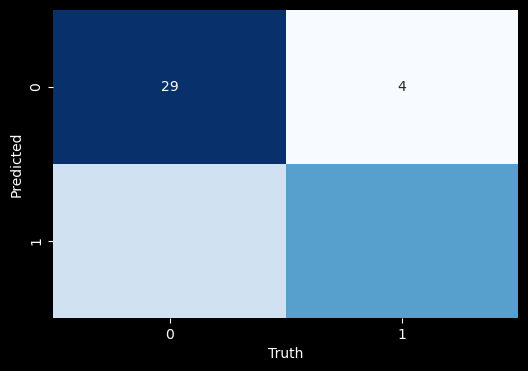

In [131]:
import seaborn as sns 
def plot_conf_matrix(conf_mat):
    """ This Function plots confusion matrix 
    """
    fig , ax = plt.subplots(figsize=(6,4))
    ax = sns.heatmap(conf_mat,annot= True ,fmt="d", cmap="Blues", cbar = False,annot_kws={"fontsize":10})
    plt.xlabel('Truth')
    plt.ylabel('Predicted')
    plt.style.use('dark_background')
    plt.show()
plot_conf_matrix(conf_mat)

##### 4. Classification Report

In [88]:
from sklearn.metrics import classification_report
print('classification_report :\n' , classification_report(y_test,y_predicted))

classification_report :
               precision    recall  f1-score   support

           0       0.76      0.88      0.82        33
           1       0.82      0.67      0.73        27

    accuracy                           0.78        60
   macro avg       0.79      0.77      0.78        60
weighted avg       0.79      0.78      0.78        60



#### Regression Model Evaluation
#### 1. R^2 
#### 2. Mean Absolute Error
#### 3. Mean Squared Error 

##### 1. R^2

In [90]:
#compares model prediction to the mean of your target
rfg.score(x_test3,y_test3)

0.8078930423121855

##### 2. Mean Absolute Error

In [144]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(1)
rfg = RandomForestRegressor()
xhousing1 = df_housing.drop('target',axis = 1)
yhousing1 = df_housing['target']
x_train3,x_test3,y_train3,y_test3 = train_test_split(xhousing1,yhousing1,test_size = 0.2)
rfg.fit(x_train3,y_train3)
rfg.score(x_test3,y_test3)
pred = rfg.predict(x_test3)
mean_absolute_error(y_test3,pred)

0.3263185694282948

In [145]:
df = pd.DataFrame(data = {'actual values': y_test3, 'predicted values' : pred})
df['difference'] = df['actual values'] - df['predicted values']
df
mae_manual = np.abs(df['difference'] )
mae_manual.mean()

0.3263185694282948

##### 3. Mean Squared Error

In [147]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,pred)

0.2530662126409951

In [148]:
mse_manual = np.square(df['difference'] )
mse_manual.mean()

0.2530662126409951

#### Scrong Parameters for Classification

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(4)
x = heart_disease.drop('condition', axis=1)
y = heart_disease['condition']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
heart_model = RandomForestClassifier().fit(x_train,y_train)
print(cross_val_score(heart_model,x,y,cv=5,scoring= None))
print(cross_val_score(heart_model,x,y,cv=5,scoring='accuracy'))
print( cross_val_score(heart_model,x,y,cv=5,scoring='precision'))
print( cross_val_score(heart_model,x,y,cv=5,scoring='recall'))
print( cross_val_score(heart_model,x,y,cv=5,scoring='f1'))
cross_val_score()

[0.56666667 0.78333333 0.81355932 0.88135593 0.62711864]
[0.58333333 0.81666667 0.81355932 0.84745763 0.55932203]
[0.66666667 0.95454545 0.79310345 0.80645161 0.52083333]
[0.07142857 0.64285714 0.85185185 0.96296296 0.92592593]
[0.13333333 0.75       0.80701754 0.9        0.67567568]


#### Scrong Parameters for Regression

In [152]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(1)
rfg = RandomForestRegressor()
xhousing1 = df_housing.drop('target',axis = 1)
yhousing1 = df_housing['target']
x_train3,x_test3,y_train3,y_test3 = train_test_split(xhousing1,yhousing1,test_size = 0.2)
rfg = RandomForestRegressor().fit(x_train3,y_train3)
print(cross_val_score(rfg,x,y,cv=5,scoring=None))
print(cross_val_score(rfg,x,y,cv=5,scoring='r2'))
print(cross_val_score(rfg,x,y,cv=5,scoring='neg_mean_squared_error'))

[ 0.02909091  0.23676268  0.41204799 -0.0391822   0.33516077]
[ 0.01802841  0.13257283  0.3919599  -0.01466591  0.33809564]
[-0.18571167 -0.13308833 -0.13829831 -0.14981864 -0.14782373]


#### Using Different Evaluation Matrics As sklearn Functions 

In [1]:
#Classification 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
import numpy as np 
import pandas as pd
np.random.seed(4)
heart_disease = pd.read_csv('Heart disease data.csv')
x = heart_disease.drop('condition',axis=1)
y =  heart_disease['condition']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
clf = RandomForestClassifier().fit(x_train,y_train,)
y_prdicted = clf.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_prdicted))
print('Precision : ',precision_score(y_test,y_prdicted))
print('Recall : ',recall_score(y_test,y_prdicted))
print('F1 : ',f1_score(y_test,y_prdicted))

Accuracy :  0.7833333333333333
Precision :  0.8181818181818182
Recall :  0.6666666666666666
F1 :  0.7346938775510204


In [9]:
#Regression 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.datasets import fetch_california_housing 
import numpy as np 
import pandas as pd
np.random.seed(4)
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing['data'],columns = housing['feature_names'])
housing_df['target'] = pd.Series(housing['target'])
x = housing_df.drop('target',axis=1)
y =  housing_df['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
housing_model = RandomForestRegressor().fit(x_train,y_train,)
y_prdicted = housing_model.predict(x_test)
print('r2_score : ',r2_score(y_test,y_prdicted))
print('mean_absolute_error : ',mean_absolute_error(y_test,y_prdicted))
print('mean_squared_error : ',mean_squared_error(y_test,y_prdicted))

r2_score :  0.8030809389906093
mean_absolute_error :  0.3316348288759691
mean_squared_error :  0.2561571713653193


### Step 5 Improviing The Model

In [1]:
#3 ways to improve model
#1 improve quality and quantity of data 
#2 change model ---> Done
#3 improve the model using hyperparameters

#### Improving model using hyperparametrs
#### 3 Ways : 
#### Manually 
#### Randomly 
#### Exhaustively

##### -Initial Code 

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import numpy as np 
import pandas as pd 
#split data into features and  label
heart_disease = pd.read_csv('Heart disease data.csv')
heart_disease = heart_disease.sample(frac=1)
x = heart_disease.drop(['condition'], axis=1)
y = heart_disease['condition']
#split data into train,validate,test = 70,15,15
train_percentage = round(.7*len(heart_disease))
valid_percentage = round(train_percentage+ 0.15*len(heart_disease))
x_train,y_train = x[:train_percentage],y[:train_percentage]
x_valid,y_valid = x[train_percentage:valid_percentage],y[train_percentage:valid_percentage]
x_test,y_test = x[valid_percentage:],y[valid_percentage:]
#First Model 
clf = RandomForestClassifier().fit(x_train,y_train)
#Baseline Prediction (Default Setting, Not changing hyperparametrs)
y_predicted = clf.predict(x_valid)
#Evaluating Model 
#Function for evaluation metrics 
def hyper(true,predicted):
    accuracy = accuracy_score(true,predicted)
    precision = precision_score(true,predicted)
    recall = recall_score(true,predicted)
    f1 = f1_score(true,predicted)
    """ This Function returns the evaluation metrics """
    metrics_dict = {'Accuracy':accuracy,'Precision':precision,'Recall':recall,'f1':f1}
    return metrics_dict
first_result = hyper(y_valid,y_predicted)
print('******EVALUATION******')
print('\nACCURACY : ',round(first_result['Accuracy'],3))
print('\nPRECISION : ',round(first_result['Precision'],3))
print('\nRECALL : ',round(first_result['Recall'],3))
print('\nF1 : ',round(first_result['f1'],3))


******EVALUATION******

ACCURACY :  0.867

PRECISION :  0.842

RECALL :  0.842

F1 :  0.842


##### -Changing Hyperparametrs Manually

In [54]:
#2nd Model 
clf2 = RandomForestClassifier(n_estimators=100).fit(x_train,y_train)
y_predicted2 = clf2.predict(x_valid)
second_result = hyper(y_valid,y_predicted2)
print('******EVALUATION******')
print('\nACCURACY : ',round(second_result['Accuracy'],3))
print('\nPRECISION : ',round(second_result['Precision'],3))
print('\nRECALL : ',round(second_result['Recall'],3))
print('\nF1 : ',round(second_result['f1'],3))

******EVALUATION******

ACCURACY :  0.867

PRECISION :  0.842

RECALL :  0.842

F1 :  0.842


In [55]:
#3rd Model 
#2nd Model 
clf3 = RandomForestClassifier(n_estimators=10,max_depth=10).fit(x_train,y_train)
y_predicted3 = clf3.predict(x_valid)
third_result = hyper(y_valid,y_predicted3)
print('******EVALUATION******')
print('\nACCURACY : ',round(third_result['Accuracy'],3))
print('\nPRECISION : ',round(third_result['Precision'],3))
print('\nRECALL : ',round(third_result['Recall'],3))
print('\nF1 : ',round(third_result['f1'],3))

******EVALUATION******

ACCURACY :  0.8

PRECISION :  0.812

RECALL :  0.684

F1 :  0.743


##### -Changig hyperparametrs through RSCV 
#####               -OR-
##### Tuning Hyperparameters using Randomized Search Cross Validation (RSCV)

In [52]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [74]:
from sklearn.model_selection import RandomizedSearchCV
hparams = {'max_depth':[None,5,10,20,30], 'n_estimators': [10,100,100,200,500,1000,2000],'min_samples_split':[2,4,6],
           'min_samples_leaf': [1,2,4],'max_features':['sqrt','log2']}
clf = RandomForestClassifier(n_jobs = 1)
rscv_clf = RandomizedSearchCV(estimator = clf, param_distributions = hparams, n_iter = 10, cv = 5, verbose = 2 )
rscv_clf.fit(x_train,y_train)
rscv_y_predicted = rscv_clf.predict(x_test)
fourth_result = hyper(y_test,rscv_y_predicted)
print('******EVALUATION******')
print('\nACCURACY : ',round(fourth_result['Accuracy'],3))
print('\nPRECISION : ',round(fourth_result['Precision'],3))
print('\nRECALL : ',round(fourth_result['Recall'],3))
print('\nF1 : ',round(fourth_result['f1'],3))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   2.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimato

In [76]:
rscv_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

##### -Changig hyperparametrs through GSCV
#####               -OR-
##### Tuning Hyperparameters using Grid Search Cross Validation (GSCV)

In [80]:
from sklearn.model_selection import GridSearchCV
hparamsg = {'max_depth':[5,10,20], 'n_estimators': [10,100,200],'min_samples_split':[2,4],
           'min_samples_leaf': [1,2],'max_features':['sqrt','log2']}
clf = RandomForestClassifier(n_jobs = 1)
gscv_clf = GridSearchCV(estimator = clf, param_grid = hparamsg, cv = 5, verbose = 2 )
gscv_clf.fit(x_train,y_train)
gscv_y_predicted = gscv_clf.predict(x_test)
fifth_result = hyper(y_test,gscv_y_predicted)
print('******EVALUATION******')
print('\nACCURACY : ',round(fifth_result['Accuracy'],3))
print('\nPRECISION : ',round(fifth_result['Precision'],3))
print('\nRECALL : ',round(fifth_result['Recall'],3))
print('\nF1 : ',round(fifth_result['f1'],3))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time

In [81]:
gscv_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 10}

##### ALL RESULTS COMPARISION

<Axes: >

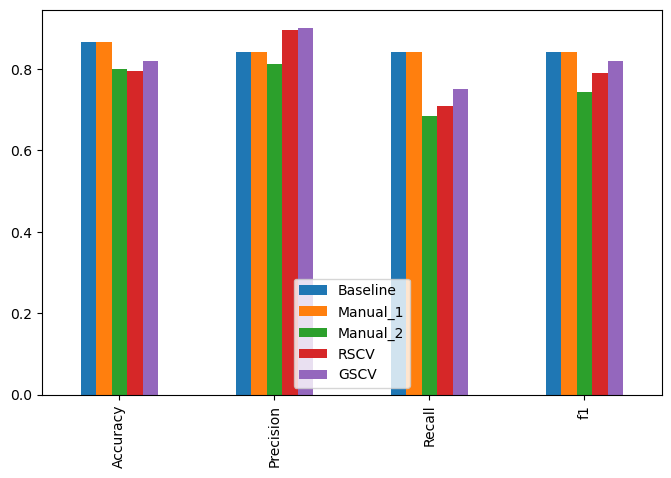

In [92]:
compariosion = pd.DataFrame({'Baseline':first_result,'Manual_1':second_result,'Manual_2':third_result,'RSCV':fourth_result ,'GSCV':fifth_result})
compariosion.plot.bar(figsize = (8,5))

### Step 6 Save Model 
### Method 1 : Pickle 
### Method 2 : Joblib 

In [86]:
#pickle 
import pickle 
#saving
pickle.dump(gscv_clf,open('GSCV_CLF.pkl','wb'))
#loading 
picled_model = pickle.load(open('GSCV_CLF.pkl','rb'))
#making predictions
predict = picled_model.predict(x_test)
hyper(y_test,predict)

{'Accuracy': 0.8181818181818182,
 'Precision': 0.9,
 'Recall': 0.75,
 'f1': 0.8181818181818182}

In [87]:
#joblib
import joblib 
#saving
joblib.dump(gscv_clf,filename='GSCV_CLF_Joblib.joblib')
#loading 
joblib_model = joblib.load(filename='GSCV_CLF_Joblib.joblib')
#making predictions
predict = picled_model.predict(x_test)
hyper(y_test,predict)

{'Accuracy': 0.8181818181818182,
 'Precision': 0.9,
 'Recall': 0.75,
 'f1': 0.8181818181818182}